<a href="https://colab.research.google.com/github/AbhinavKumar07/P113/blob/main/C113_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clone the required dataset from given

In [16]:
#Cloning the required dataset
!git clone https://github.com/procodingclass/Pro-M3-Hurricane-Damage-Dataset


fatal: destination path 'Pro-M3-Hurricane-Damage-Dataset' already exists and is not an empty directory.


Display first image from training dataset

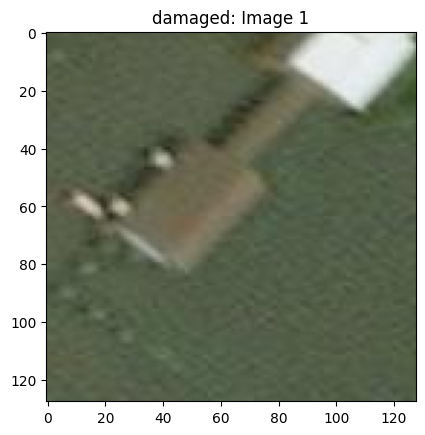

In [17]:
#Display image
from matplotlib import pyplot
from matplotlib.image import imread

training_damaged_image = "/content/Pro-M3-Hurricane-Damage-Dataset/train/damage/image (1).jpeg"

# load image pixels
image = imread(training_damaged_image)

pyplot.title("damaged: Image 1")

# plot raw pixel data
pyplot.imshow(image)

# show the figure
pyplot.show()

Perform augmentation on Training dataset

In [18]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator


training_data_generator = ImageDataGenerator(rescale= 1.0/255 , width_shift_range=0.2, height_shift_range=0.35, zoom_range = 0.4 , fill_mode='nearest')

training_images = "/content/Pro-M3-Hurricane-Damage-Dataset/train/damage/"

training_augmented_images = training_data_generator.flow_from_directory(training_images,target_size=(180,180))

Found 0 images belonging to 0 classes.


Visualize the augmented images in four sub-plots

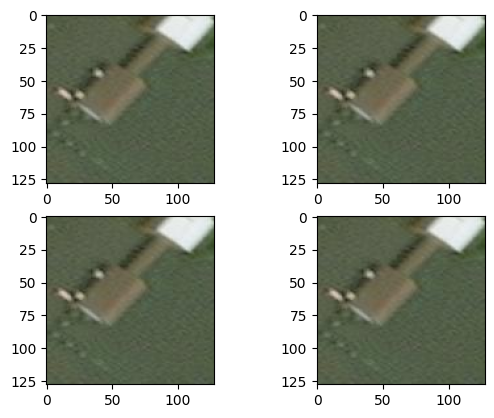

In [19]:
from matplotlib import pyplot
from matplotlib.image import imread

for i in range(4):

	pyplot.subplot(2, 2, i+1)

	batch = training_augmented_images.next()

	pyplot.imshow(image)

pyplot.show()


CNN Model

In [20]:
import tensorflow as tf


model = tf.keras.models.Sequential([

    # 1st Convolution & Pooling layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # 2nd Convolution & Pooling layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # 3rd Convolution & Pooling layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # 4th Convolution & Pooling layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a Dense Layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    # Classifiction Layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 89, 89, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 20, 20, 128)      

In [21]:
#Compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics=['accuracy'])



Running Model


In [22]:
#Fit and save the model
history = model.fit(training_augmented_images, epochs = 20 , validation_data = training_augmented_images, verbose = True)
model.save('Hurricane_damage.h5')

ValueError: ignored

In [ ]:
!pip install tensorflow.keras.preprocessing.image

In [ ]:
from matplotlib import image
from matplotlib import pyplot
from matplotlib import imread
import os
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

test_image_directory = '/content/Pro-M3-Hurricane-Damage-Dataset/train/damage/image (1).jpeg'
image_files = os.listdir(test_image_directory)



for file in image_files[7:23]:

  #Full image path
  image_files_path = os.path.join(test_image_directory,file)

  #Load image , convert to array , increase dimension , then predict class of image
  image_1 = load_img(image_files_path,target_size=(180,180))
  image_2 = img_to_array(image_1)
  image_3 = np.expand_dims(image_2,axis = 0)
  prediction = model.predict(image_3)


  predict_class = np.argmax(prediction , axis = 1)
  #(takes maximum value from x axis of prediction array)
  print(predict_class)

  #Plot the images
  pyplot.subplot(4,4,i+1)
  pyplot.imshow(image_2.astype('uint8'))

  #Title of plot
  pyplot.title(predict_class[0])

  pyplot.axis('off')

  i = i+1
pyplot.show()